In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import precision_recall_curve
%matplotlib inline

In [15]:
#Obtenemos los datos
data1 = pd.read_csv('reprocessed.hungarian.data',sep=' ')
data1 = np.array(data1.dropna())
X = np.array(data1[:,:12])
Y = np.array(data1[:,13])
Y[Y > 1] = 1
print(np.shape(X))
print(np.shape(Y))

(293, 12)
(293,)


In [16]:
eBAG = []
eFORC = []
eOOBBag = []
eOOBFRC = []
X_train, X_validation, Y_train, Y_validation = sklearn.model_selection.train_test_split(X, Y, test_size=0.5)
#El B es el numero de boothstrapping y el numero de arboles de nuestro bosque.
n_boot = 300
for i in range(n_boot):
    bstrRegr = BaggingClassifier(n_estimators=i+1)
    bOOBRegr = BaggingClassifier(n_estimators=i+1,oob_score=True)
    bstrRegr.fit(X_train, Y_train)
    camaleon = bstrRegr.predict_proba(X_validation)[:,0]
    eBAG.append(log_loss(Y_validation,camaleon))
    #eBAG.append(np.mean(-1*cross_val_score(bstrRegr, X_validation,Y_validation,cv=3,scoring='neg_mean_squared_error')))
    bOOBRegr.fit(X_train, Y_train)
    camaleon1 = bOOBRegr.predict_proba(X_validation)[:,0]
    eOOBBag.append(log_loss(Y_validation,camaleon1))
    #eOOBBag.append(np.mean(-1*cross_val_score(bOOBRegr, X_validation,Y_validation,cv=3,scoring='neg_mean_squared_error')))
    clf = RandomForestClassifier(n_estimators=i+1)
    clfoob = RandomForestClassifier(n_estimators=i+1,oob_score=True)
    clf.fit(X_train, Y_train) 
    camaleon2 = clf.predict_proba(X_validation)[:,0]
    eFORC.append(log_loss(Y_validation,camaleon2))
    #eFORC.append(np.mean(-1*cross_val_score(clf, X_validation,Y_validation,cv=3,scoring='neg_mean_squared_error')))
    clfoob.fit(X_train, Y_train) 
    camaleon3 = clfoob.predict_proba(X_validation)[:,0]
    eOOBFRC.append(log_loss(Y_validation,camaleon3))
    #eOOBFRC.append(np.mean(-1*cross_val_score(clfoob, X_validation,Y_validation,cv=3,scoring='neg_mean_squared_error')))

/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:606: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:611: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:606: UserWarning: Some inputs do not have OOB scores. This probably means too few est

(300,)


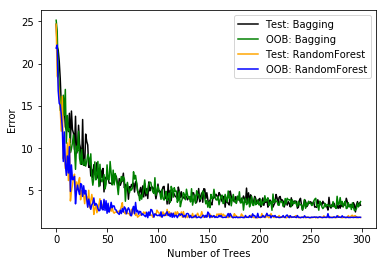

In [17]:
print(np.shape(eBAG))
x=np.arange(n_boot)
plt.plot(x, eBAG, c = 'black', label='Test: Bagging')
plt.plot(x,eOOBBag, c='g', label='OOB: Bagging')
plt.plot(x, eFORC,  c='orange', label='Test: RandomForest')
plt.plot(x,eOOBFRC, c='blue', label='OOB: RandomForest')
plt.xlabel('Number of Trees')
plt.ylabel('Error')
plt.legend()

In [25]:
data = pd.read_csv('OJ.csv')
data = data.dropna()
data = data.drop("Unnamed: 0",axis=1)
X1 = data[["WeekofPurchase","StoreID","PriceCH","PriceMM","DiscCH","DiscMM","SpecialCH","SpecialMM","LoyalCH","SalePriceMM","SalePriceCH","PriceDiff","PctDiscMM","PctDiscCH","ListPriceDiff","STORE"]]
Y1 = data['Purchase']
#Y1[Y1=='CH'] = 0
#Y1[Y1=='MM'] = 1
#print(np.shape(X1))
#print(np.shape(Y1))
Y1.dtype
print(np.shape(X1))

(1070, 16)


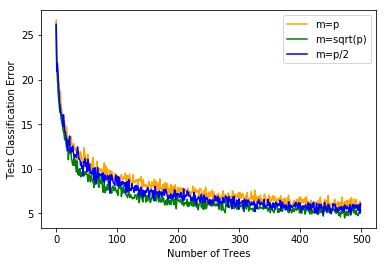

In [14]:
e1 = []
e2 = []
e3 = []
n_boot2 = 500
p=16
x_train, x_validation, y_train, y_validation = sklearn.model_selection.train_test_split(X1, Y1, test_size=0.5)

for i in range(n_boot2):
    fore = RandomForestClassifier(n_estimators=i+1,max_features=p)
    fore1 = RandomForestClassifier(n_estimators=i+1)
    fore2 = RandomForestClassifier(n_estimators=i+1,max_features=(8))
    fore.fit(x_train, y_train) 
    fore1.fit(x_train, y_train)
    fore2.fit(x_train, y_train)
    camaleon1 = fore.predict_proba(x_validation)[:,0]
    camaleon2 = fore1.predict_proba(x_validation)[:,0]
    camaleon3 = fore2.predict_proba(x_validation)[:,0]
    e1.append(log_loss(y_validation,camaleon1))
    e2.append(log_loss(y_validation,camaleon2))
    e3.append(log_loss(y_validation,camaleon3))
x=np.arange(n_boot2)
plt.plot(x, e1, c = 'orange', label='m=p')
plt.plot(x,e2, c='g', label='m=sqrt(p)')
plt.plot(x, e3,  c='b', label='m=p/2')
plt.xlabel('Number of Trees')
plt.ylabel('Test Classification Error')
plt.legend()

Al querer comparar estos modelos:
- Logistic regresion.
- Linear discriminant analysis.
- Classification Tree.
- Random Forest.

Necesitamos un criterio que podamos establecer en cada uno. Para ello, usaremos una curva de precision recall pues en cada uno de estos podemos calcular las probabilidades y por ende esta curva. Sin embargo, para el clasification tree hemos de determinar cual es la mejor profundidad...

/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


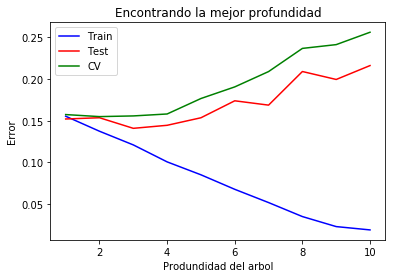

In [13]:
Y2 = Y1
Y2[Y2=='CH'] = 0
Y2[Y2=='MM'] = 1
x_train, x_validation, y_train, y_validation = sklearn.model_selection.train_test_split(X1, Y2, test_size=0.5)
a = np.arange(10)+1
MSETrain = []
MSETest = []
MSEcv = []
for i in range(len(a)):
    regressor = DecisionTreeRegressor(max_depth=i+1)
    regressor.fit(x_train, y_train)
    MseCV = -1*cross_val_score(regressor, x_train,y_train,cv=6,scoring='neg_mean_squared_error')
    camaleon1 = regressor.predict(x_train)
    camaleon2 = regressor.predict(x_validation)
    MseTrain = mean_squared_error(y_train,camaleon1)
    MseTest = mean_squared_error(y_validation,camaleon2)
    MSETrain.append(MseTrain)
    MSETest.append(MseTest)
    MSEcv.append(np.mean(MseCV))
plt.plot(a,MSETrain,c='b',label = 'Train')
plt.plot(a,MSETest,c='r',label = 'Test')
plt.plot(a,MSEcv,c='g',label = 'CV')
plt.title('Encontrando la mejor profundidad')
plt.xlabel('Produndidad del arbol')
plt.ylabel('Error')
plt.legend()

Podemos concluir que la mejor profundidad del arbol es 3. Ahora si podemos calcular todas las probabilidades de todos los metodos!

In [26]:
#Y1[Y1=='CH'] = 0
#Y1[Y1=='MM'] = 1
x_train, x_validation, y_train, y_validation = sklearn.model_selection.train_test_split(X1, Y1, test_size=0.5)
bosque = RandomForestClassifier(n_estimators=150)
bosque.fit(x_train,y_train)
probsBosque = bosque.predict_proba(x_validation)[:,1]
precisionB,recallB,thresholdB = precision_recall_curve(y_validation,probsBosque)

lr = LogisticRegression()
lr.fit(x_train,y_train)
probsLog = lr.predict_proba(x_validation)[:,1]
precisionLR,recallLR,thresholdLR = precision_recall_curve(y_validation,probsLog)

arbolito = DecisionTreeClassifier(max_depth)
arbolito.fit(x_train,y_train)
probsArbol = arbolito.predict_proba(x_validation)[:,1]
precisionA,recallA,thresholdA = precision_recall_curve(y_validation,probsArbol)

LDA = LinearDiscriminantAnalysis(solver='lsqr')
LDA.fit(x_train,y_train)
probsLDA = LDA.predict_proba(x_validation)[:,1]
precisionLDA,recallLDA,thresholdLDA = precision_recall_curve(y_validation,probsLDA)


ValueError: Data is not binary and pos_label is not specified

No logre ganarle a este error, no importa si le mando los datos en dataframe o en np.array. Igual no logra darse cuenta si son binarios o no. Todo muy frustrante.